In [1]:
import data_analysis_funcs as daf
import matplotlib.pyplot as plt

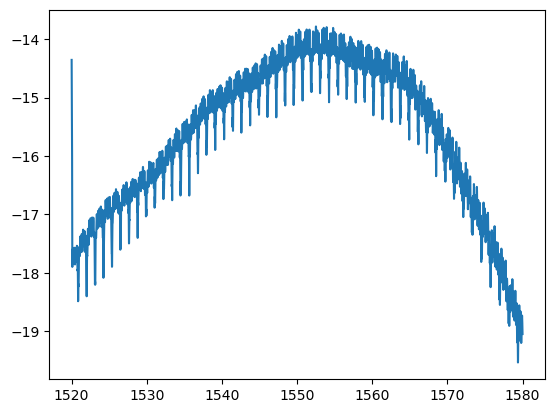

In [2]:
data_analyse_file="sg_rr_84_025 2023-12-11 16-27-03.csv"
wvlen_array,pow_array=daf.get_wavlen_and_pow_arrays(data_analyse_file)
daf.plot_visualise(wvlen_array,pow_array, full_range=True)

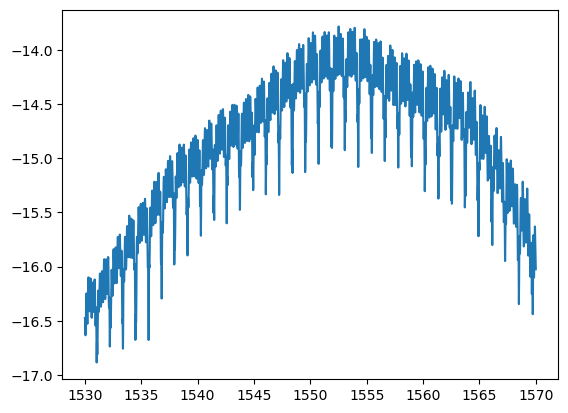

1530.0
1570.0


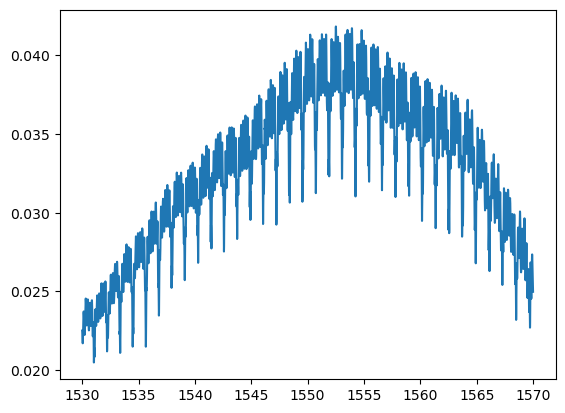

[0.02251494 0.02242451 0.02223661 ... 0.02533345 0.02506215 0.02498076]


In [3]:
start_point_index=1000
end_point_index=5001
daf.plot_visualise(wvlen_array,pow_array,full_range=False,start_index=start_point_index,stop_index=end_point_index)
wvlen_peak_search=wvlen_array[start_point_index:end_point_index] #selects wavelengths to search through
power_peak_search_dBm=pow_array[start_point_index:end_point_index] # selects powers to search though
power_peak_search=daf.vector_dBm_to_mW(power_peak_search_dBm) #converts powers to mW
print(wvlen_peak_search[0])
print(wvlen_peak_search[-1])
plt.plot(wvlen_peak_search,power_peak_search)
plt.show()
print(power_peak_search)

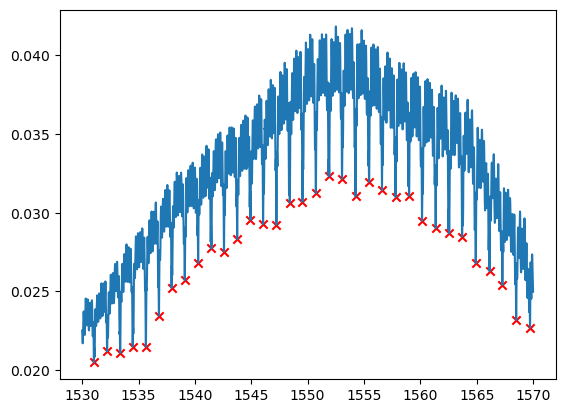

34
[1531.04, 1532.21, 1533.37, 1534.48, 1535.65, 1536.81, 1537.93, 1539.1, 1540.29, 1541.47, 1542.58, 1543.75, 1544.93, 1546.05, 1547.23, 1548.42, 1549.54, 1550.73, 1551.92, 1553.05, 1554.25, 1555.46, 1556.6, 1557.8, 1559.0, 1560.15, 1561.36, 1562.56, 1563.71, 1564.92, 1566.14, 1567.28, 1568.5, 1569.73]


In [6]:
wvlen_step_size=0.01
approx_fsr=1.7
promin_use=0.003
dist_use=(approx_fsr/2)/wvlen_step_size
#dist_use=1
peak_locs,n_peaks,peak_wavelens,peak_powers=daf.give_peak_locs(wvlen_step_size,approx_fsr,promin_use,dist_use,wvlen_peak_search,power_peak_search)
plt.plot(wvlen_peak_search,power_peak_search)
plt.scatter(peak_wavelens,peak_powers,color="red", marker="x")
plt.show()
print(n_peaks)#just added for check
print(peak_wavelens)#check

In [7]:
fsr_values=daf.calc_fsrs(peak_wavelens)
fsr_mean,fsr_error=daf.fsr_avg_and_error(fsr_values)
print(fsr_values)
print(fsr_mean)
print(fsr_error)

[1.17 1.16 1.11 1.17 1.16 1.12 1.17 1.19 1.18 1.11 1.17 1.18 1.12 1.18
 1.19 1.12 1.19 1.19 1.13 1.2  1.21 1.14 1.2  1.2  1.15 1.21 1.2  1.15
 1.21 1.22 1.14 1.22 1.23]
1.1724242424242441
0.0059834098769671355


Now to calculate peak widths below:

[0.12748028 0.15254064 0.12838122 0.1401841  0.16418155 0.13490376
 0.13019204 0.21137461 0.13100811 0.13557802 0.14240101 0.13748905
 0.13505127 0.14409916 0.20902866 0.14225336 0.14753613 0.14966286
 0.15484287 0.15238047 0.15367307 0.14520316 0.14997381 0.23494937
 0.14565881 0.15267253 0.24027607 0.16305618 0.15732568 0.17069646
 0.14658    0.14787055 0.08376064 0.06590527]


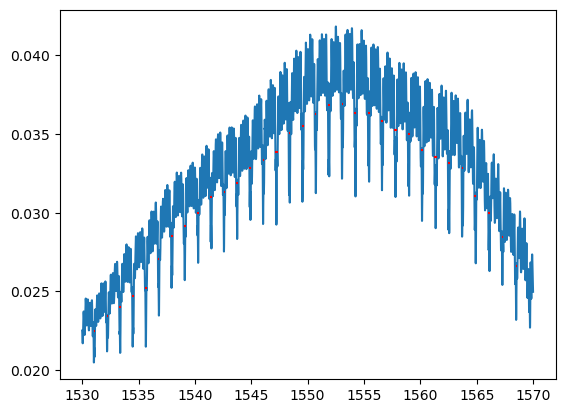

In [8]:
peak_width_data=daf.get_peak_FWHM(wvlen_step_size,approx_fsr,promin_use,dist_use,wvlen_peak_search,power_peak_search)
peak_widths=peak_width_data[0]
print(peak_widths)
peak_width_heights=peak_width_data[1]
peak_width_lefts=peak_width_data[2]
peak_width_rights=peak_width_data[3]
daf.plot_lines_FWHM(peak_width_heights,peak_width_lefts,peak_width_rights,wvlen_peak_search,power_peak_search)


Now calculating mean and standard error on FWHM using same func as for fsr:

In [9]:
mean_FWHM,FWHM_error=daf.fsr_avg_and_error(peak_widths)
print(mean_FWHM)
print(FWHM_error)

0.15082855204548865
0.0058058346947930505


Now to to calculate Q factor, and its error, and Q^3/R^2, and its error.

In [10]:
Q_factor_list=peak_wavelens/peak_widths
mean_Q_factor,Q_factor_error=daf.fsr_avg_and_error(Q_factor_list)
print(mean_Q_factor)
print(Q_factor_error)


10861.168737221205
523.8149831497363


In [11]:
radius=84
radius_error=0.1
Qcubed_over_Rsquared,Qcubed_over_Rsquared_error=daf.calc_Q3overR2(mean_Q_factor,Q_factor_error,radius,radius_error)
print(Qcubed_over_Rsquared)
print(Qcubed_over_Rsquared_error)

181581295.59314936
26275592.484430067
